Andy Yang

**Introduction**


For my project I grouped video game sales data by publisher and platform and looked to see if there were any trends between those features and genre of game. Also, I used information about publisher, platform, and genre to see if I could predict how many global sales a game would have.

**Data**

I looked at a list of video games with sales greater than 100,000 copies. Features include:

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

For example, the number 1 ranked game is Wii Sports, for the Wii, published in	by Nintendo in2006, under the Sports genre, and 41.49M sales in NA,	29.02M sales in EU,.77M sales in JP,	8.46M sales in the rest of the world, totalling to	82.74M total sales.

**Methodology**

I used K-means clustering, rand index, and linear regression for this project. I hypothesize that there could be a relationship between publisher/platform and genre, and also that NA would be the greatest contributer to global sales. This data set made techniques from our class fitting because we have information about each individual game, but not about what companies see (which platforms/publishers prefer to make which genre) and habits about consumers like us (what publisher, platform, genre sells the most).



**Analysis**


 

In [ ]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy
import sklearn.datasets as datasets
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import time
import pandas as pd
from scipy.cluster.vq import whiten
from sklearn.metrics import rand_score

In [ ]:
games = pd.read_csv("vgsales.csv")
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# I got this code from Daniel Cho with permission
cols = [col for col in games.columns]
for col in cols:
  if games[col].dtype != np.dtype(float):
    if games[col].dtype == np.dtype(object):
      games[col] = pd.factorize(games[col])[0]
    else:
      games[col] = games[col].astype(float)
games = games.dropna()
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,0,0,2006.0,0,0,41.49,29.02,3.77,8.46,82.74
1,2.0,1,1,1985.0,1,0,29.08,3.58,6.81,0.77,40.24
2,3.0,2,0,2008.0,2,0,15.85,12.88,3.79,3.31,35.82
3,4.0,3,0,2009.0,0,0,15.75,11.01,3.28,2.96,33.00
4,5.0,4,2,1996.0,3,0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596.0,11491,8,2002.0,1,187,0.01,0.00,0.00,0.00,0.01
16594,16597.0,2902,18,2003.0,6,51,0.01,0.00,0.00,0.00,0.01
16595,16598.0,6637,6,2008.0,2,4,0.00,0.00,0.00,0.00,0.01
16596,16599.0,11492,3,2010.0,4,507,0.00,0.01,0.00,0.00,0.01


Above is a cleaned version of the original table with all the categorical values converted to float. Any rows with NaN as values were dropped.

In [ ]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
features = ["Publisher", "Platform"]
features_scaled = pd.DataFrame(whiten(games[features]))
kmeans = KMeans()
X_train, X_test, y_train, y_test = train_test_split(features_scaled, games["Genre"])
kmeans.fit(X_train)
print(kmeans.predict(X_test))
print(adjusted_rand_score(y_test,kmeans.predict(X_test)))

[7 1 3 ... 7 4 3]
0.013404781263600672


Performing K means clustering and finding the adjusted rand index score.

In [ ]:
def error(predicted, actual):
  sq_diff = 0
  for x in range(len(predicted)):
    sq_diff += (predicted[x] - actual[x]) ** 2
  return (sq_diff / len(predicted)) ** 0.5

Function for RMSE

In [ ]:
from sklearn.linear_model import LinearRegression
NAfeatures = ["NA_Sales"]
A = games[NAfeatures].to_numpy()
Aones = np.append(A,np.ones([len(A),1]),1)
y = games["Global_Sales"].to_numpy()
y = np.array(y).reshape((len(y),1))
x = np.linalg.inv(np.transpose(Aones) @ Aones) @ np.transpose(Aones) @ y
print(x)
print("North America sales RMSE", error(Aones @ x, y))



[[1.7938038 ]
 [0.06412916]]
North America sales RMSE [0.52867096]


Text(0, 0.5, 'Global Sales')

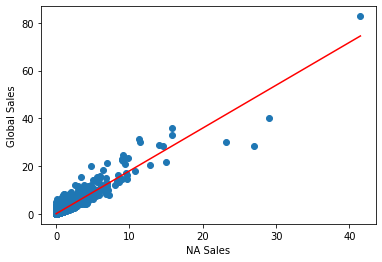

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(A,y)
ax.plot(A, Aones @ x, 'r')
ax.set_xlabel("NA Sales")
ax.set_ylabel("Global Sales")




In [ ]:
from sklearn.linear_model import LinearRegression
EUfeatures = ["EU_Sales"]
A = games[EUfeatures].to_numpy()
Aones = np.append(A,np.ones([len(A),1]),1)
y = games["Global_Sales"].to_numpy()
y = np.array(y).reshape((len(y),1))
x = np.linalg.inv(np.transpose(Aones) @ Aones) @ np.transpose(Aones) @ y
print(x)
print("Europe sales RMSE", error(Aones @ x, y))


[[2.77982612]
 [0.13005606]]
Europe sales RMSE [0.67178886]


Text(0, 0.5, 'Global Sales')

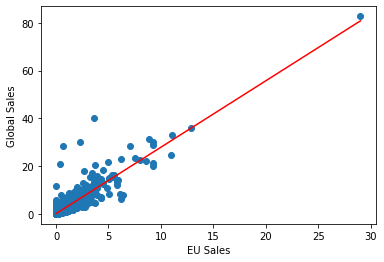

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(A,y)
ax.plot(A, Aones @ x, 'r')
ax.set_xlabel("EU Sales")
ax.set_ylabel("Global Sales")



In [ ]:
from sklearn.linear_model import LinearRegression
JPfeatures = ["JP_Sales"]
A = games[JPfeatures].to_numpy()
Aones = np.append(A,np.ones([len(A),1]),1)
y = games["Global_Sales"].to_numpy()
y = np.array(y).reshape((len(y),1))
x = np.linalg.inv(np.transpose(Aones) @ Aones) @ np.transpose(Aones) @ y
print(x)
print("Japan sales RMSE", error(Aones @ x, y))



[[3.07959956]
 [0.29798679]]
Japan sales RMSE [1.23727057]


Text(0, 0.5, 'Global Sales')

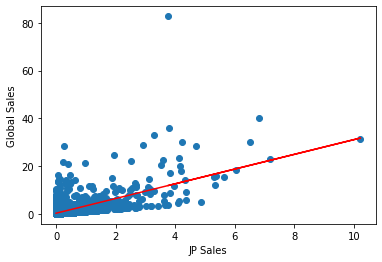

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(A,y)
ax.plot(A, Aones @ x, 'r')
ax.set_xlabel("JP Sales")
ax.set_ylabel("Global Sales")


In [ ]:
from sklearn.linear_model import LinearRegression
OTHERfeatures = ["Other_Sales"]
A = games[OTHERfeatures].to_numpy()
Aones = np.append(A,np.ones([len(A),1]),1)
y = games["Global_Sales"].to_numpy()
y = np.array(y).reshape((len(y),1))
x = np.linalg.inv(np.transpose(Aones) @ Aones) @ np.transpose(Aones) @ y
print(x)
print("Other sales RMSE", error(Aones @ x, y))



[[6.1675457 ]
 [0.24218195]]
Other sales RMSE [1.03918797]


Text(0, 0.5, 'Global Sales')

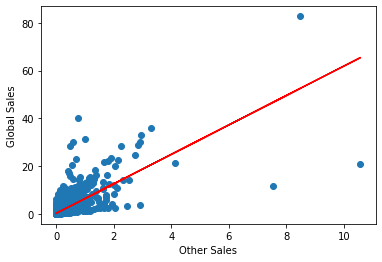

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(A,y)
ax.plot(A, Aones @ x, 'r')
ax.set_xlabel("Other Sales")
ax.set_ylabel("Global Sales")



NA_Sales has the lowest RMSE (0.52) of all the regions and "others" have the highest slope. Therefore, the "Other" countries contribute the most to global sales because the slope of the best fit line is greatest meaning the rate of change is greatest. Also that, if you are only allowed to be provided with one region’s sales figures and you have to make an accurate prediction of global sales from it, then your best choice is to pick NA sales

**Results**

My analysis refutes my claims. First, there was no relationship between publisher/platform of a game and genre of the game because the rand index score of the clustering is too low and signifies low similarity. Perhaps this is because publisher/platform of games is not limited by genre: being from a specific publisher/platform does not mean you will tend to make certain genres of games. 

I also found that by finding the RMSE of each region's predicted sales vs global sales, we can see that NA has the lowest and "Others" has the greatest best fit line slope. As a result, this means that the "Others" group is the biggest contributor to global sales with slope = 6.17, and that with RMSE 1.79, NA is the best predictor of global sales.



**Conclusion**

In this study, I attempted to cluster a dataset about video game sales by publisher and platform to see if there was any relationship to genre of games released. The rand index score indicates that there is none. Additionally, I looked for which region, North America, Europe, Japan, or Other, contributed most to global sales. As it turns out, NA is not the biggest contributor but actually all countries outside of these are.

**WORKS CITED**

Varia, Mayank, DS121 Lecture 20

Varia, Mayank, DS121 Lecture 24

Varia, Mayank, DS121 Lecture 13

Dataset from https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Games.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Games.ipynb to pdf
[NbConvertApp] Support files will be in Games_files/
[NbConvertApp] Making directory ./Games_files
[NbConvertApp] Making directory ./Games_files
[NbConvertApp] Making directory ./Games_files
[NbConvertApp] Making directory ./Games_files
[NbConvertApp] Writing 47972 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 91426 bytes to /content/drive/My Drive/Games.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'